In [15]:
import matplotlib
import numpy as np
import pandas as pd

pd.__version__

'0.24.1'

In [21]:
pd.set_option('float_format', '{:f}'.format)
bitcoin_data = pd.read_csv('./data/bitstampUSD_1-min_data_2012-01-01_to_2018-11-11.csv')
bitcoin_data['TimestampDateTimeFormat'] = pd.to_datetime(bitcoin_data['Timestamp'], unit='s')
# bitcoin_data['TimestampInString'] = bitcoin_data['Timestamp'].astype(str)
bitcoin_data = bitcoin_data.dropna(subset=['Weighted_Price'])
bitcoin_data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,TimestampDateTimeFormat
0,1325317920,4.390000,4.390000,4.390000,4.390000,0.455581,2.000000,4.390000,2011-12-31 07:52:00
478,1325346600,4.390000,4.390000,4.390000,4.390000,48.000000,210.720000,4.390000,2011-12-31 15:50:00
547,1325350740,4.500000,4.570000,4.500000,4.570000,37.862297,171.380338,4.526411,2011-12-31 16:59:00
548,1325350800,4.580000,4.580000,4.580000,4.580000,9.000000,41.220000,4.580000,2011-12-31 17:00:00
1224,1325391360,4.580000,4.580000,4.580000,4.580000,1.502000,6.879160,4.580000,2012-01-01 04:16:00


In [3]:
bitcoin_data['Weighted_Price'].describe()

count   2388829.000000
mean       2571.319982
std        3628.797332
min           3.800000
25%         323.500000
50%         622.738090
75%        4201.000000
max       19663.298888
Name: Weighted_Price, dtype: float64

In [4]:
bitcoin_data.loc[bitcoin_data['Weighted_Price'] == 19663.298888]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
3130120,2017-12-17 12:24:00,19663.990000,19665.750000,19649.960000,19665.750000,5.735307,112775.051030,19663.298888


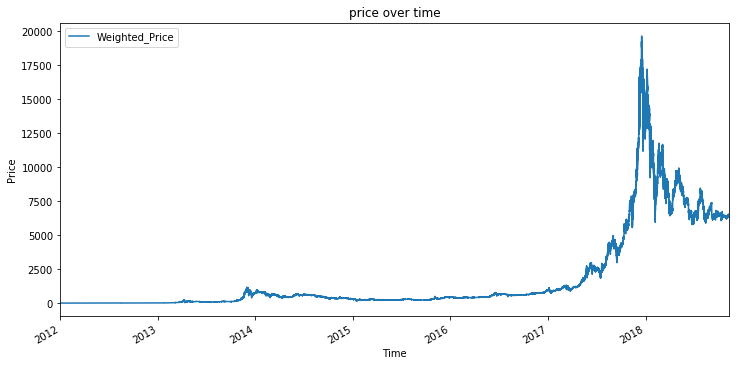

In [22]:
import matplotlib.pyplot as plt
bitcoin_data.plot(x='TimestampDateTimeFormat', y='Weighted_Price', figsize=(12, 6))
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('price over time')
plt.show()

In [24]:
from sklearn.cluster import KMeans
data = bitcoin_data[['Weighted_Price', 'Timestamp']]
n_cluster = range(1, 20)


kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

KeyboardInterrupt: 

Above curve goes flat at around 5 clusters, which means adding more clusters will not explain much more of the variance in our relevant variables